Name: Aditya Gujar <br>
USN: 2448505 <br>
Subject: SPR <br>
Lab-5

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [ ]:
signal1 = np.array([0.2, 0.4, 0.6, 0.8, 1.0, 0.8, 0.6, 0.4, 0.2])
signal2 = np.array([0.2, 0.3, 0.5, 0.7, 0.9, 1.0, 0.9, 0.7, 0.5, 0.4, 0.3, 0.2])

len1 = len(signal1)
len2 = len(signal2)

signal1, signal2, len1, len2


(array([0.2, 0.4, 0.6, 0.8, 1. , 0.8, 0.6, 0.4, 0.2]),
 array([0.2, 0.3, 0.5, 0.7, 0.9, 1. , 0.9, 0.7, 0.5, 0.4, 0.3, 0.2]),
 9,
 12)

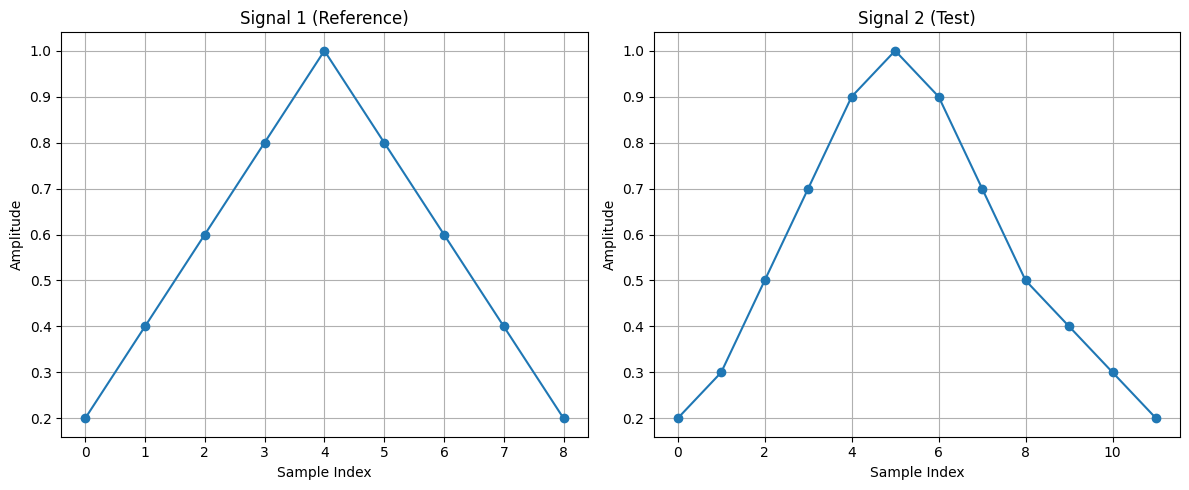

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(signal1, marker='o')
plt.title("Signal 1 (Reference)")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(signal2, marker='o')
plt.title("Signal 2 (Test)")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
# Time axes (0 to 1)
x_old = np.linspace(0, 1, len2)

# Interpolation function for signal2
f = interp1d(x_old, signal2, kind='linear')

# New time axis with same number of samples as signal1
x_new = np.linspace(0, 1, len1)

# Normalized version of signal2
signal2_normalized = f(x_new)

signal2_normalized


array([0.2   , 0.375 , 0.65  , 0.9125, 0.95  , 0.725 , 0.475 , 0.3375,
       0.2   ])

In [ ]:
alignment = signal1 - signal2_normalized
mse = np.mean(alignment ** 2)

print("Mean Squared Error after Linear Time Normalization:", round(mse, 4))


Mean Squared Error after Linear Time Normalization: 0.0048


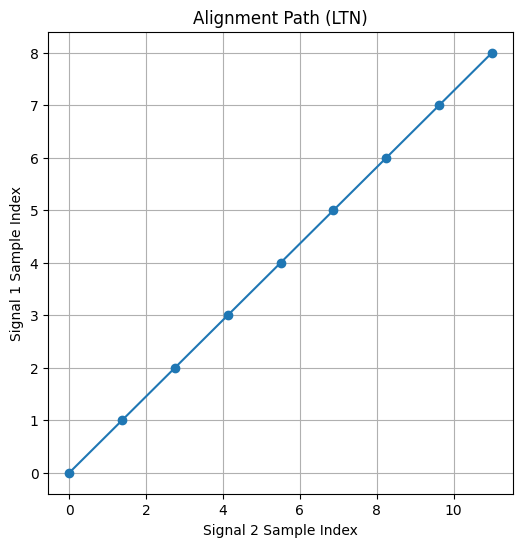

In [ ]:
signal1_indices = np.arange(len1)
signal2_indices = np.linspace(0, len2 - 1, len1)

plt.figure(figsize=(6,6))
plt.plot(signal2_indices, signal1_indices, marker='o')
plt.title("Alignment Path (LTN)")
plt.xlabel("Signal 2 Sample Index")
plt.ylabel("Signal 1 Sample Index")
plt.grid(True)
plt.show()


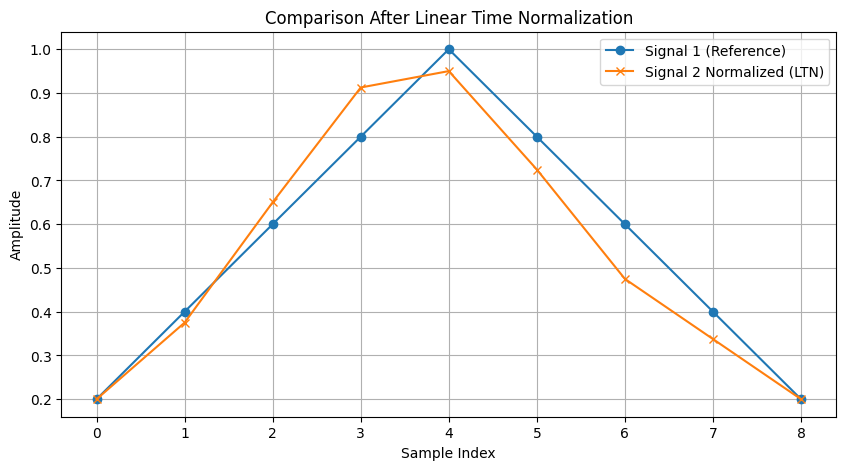

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(signal1, marker='o', label='Signal 1 (Reference)')
plt.plot(signal2_normalized, marker='x', label='Signal 2 Normalized (LTN)')
plt.title("Comparison After Linear Time Normalization")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.show()
